In [1]:
# coding: utf-8

from __context__ import *
from __future__ import print_function, unicode_literals, division

import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorlayer as tl
from IPython.core.display import clear_output

# import pdb
# from data_provider.datafeed.quote_feed import QuoteFeed
# from data_provider.datafeed.universe import Universe
# uni = Universe()


sess = None


## 构建数据

## 获取行情

In [6]:
begdate = 20170101
enddate = 20180505
code = '000002.SZ'
predict_period=5

DB = gcrl.db('internal')
DB.query_init({'code': code, 'begin': begdate, 'end': enddate, 'fields': '*'})
DB.query.update({'dtype':'cycle', 'n_cycle': 1, 'freq': pycoraldb.D})
rawdf = DB.getBar(4)
# gclean = gfc.clean_rdata(rawdf)
# clean_df = gclean.remove_by_time('stock')

# begdate = 20050101
# enddate = 20180505
# code = '000002.SZ'
# predict_period=5
# qf = QuoteFeed(universe_ticker=[code],
#                        begin_day = begdate,
#                        end_day = enddate,
#               tracking_freq = 86400,
#               adjust_method = 'forward')
# qf.load_feed()
# raw_quota = qf.get_stock_quote()
# qf = QuoteFeed(universe_ticker='000905.SH',  
#                        begin_day = begdate,
#                        end_day = enddate,
#               tracking_freq = 86400,
#               adjust_method = 'forward',
#               is_index=True) #加一行这个
            
# qf.load_feed()
# i_quota = qf.get_index_quote()

In [9]:
rawdf['close'] = rawdf['new_price'].copy()

,timestamp,dtype,date,stamp,code,name,market,type,status,new_price,new_volume,new_amount,sum_volume,sum_amount,open,high,low,iopv,bp1,bp2,bp3,bp4,bp5,bp6,bp7,bp8,bp9,bp10,bv1,bv2,bv3,bv4,bv5,bv6,bv7,bv8,bv9,bv10,ap1,ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,av1,av2,...,av7,av8,av9,av10,upper_limit,lower_limit,pre_close,close,pre_settle,settle,pre_open_interest,open_interest,pre_delta,delta,pre_price,new_bs_flag,new_bid_volume,new_bid_amount,new_ask_volume,new_ask_amount,sum_bid_volume,sum_bid_amount,sum_ask_volume,sum_ask_amount,bid_order_volume,bid_order_amount,bid_cancel_volume,bid_cancel_amount,ask_order_volume,ask_order_amount,ask_cancel_volume,ask_cancel_amount,new_knock_count,sum_knock_count,volume_multiple,price_tick,create_date,list_date,expire_date,start_settle_date,end_settle_date,exercise_date,exercise_price,cp_flag,underlying_code,underlying_type,weighted_avg_bid_price,weighted_avg_ask_price,ytm,action_date
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03 15:00:00,2017-01-03 15:00:00,1,20170103,150000000,000002.SZ,万 科Ａ,2,16,0,20.73,21701669,449757486.0,21701669,449757486.0,20.55,20.87,20.55,0.0,20.73,20.72,20.71,20.70,20.69,20.68,20.67,20.66,20.65,20.64,397799,227100,52700,265625,64400,111700,37000,116100,124734,7000,20.74,20.75,20.76,20.77,20.78,20.79,20.80,20.81,20.82,20.83,120900,172300,...,309500,28200,28756,47000,22.61,18.50,20.55,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1,11300789,2.342898e+08,10400880,2.154677e+08,11300789,2.342898e+12,10400880,2.154677e+12,0,0.0,0,0.0,0,0.0,0,0.0,60663738,60663738,0,0.0,0,0,0,0,0,0,0.0,0,,0,20.28,21.77,0.0,20170103
2017-01-04 15:00:00,2017-01-04 15:00:00,1,20170104,150000000,000002.SZ,万 科Ａ,2,16,0,20.85,33155480,686745321.0,33155480,686745321.0,20.74,20.95,20.45,0.0,20.85,20.84,20.83,20.82,20.81,20.80,20.79,20.78,20.77,20.76,82851,118400,126730,88100,42600,96495,121700,99200,12800,23100,20.86,20.87,20.88,20.89,20.90,20.91,20.92,20.93,20.94,20.95,67000,45200,...,75900,94300,45400,270100,22.80,18.66,20.73,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,15488711,3.212244e+08,17666769,3.655209e+08,15488711,3.212244e+12,17666769,3.655209e+12,0,0.0,0,0.0,0,0.0,0,0.0,83135172,83135172,0,0.0,0,0,0,0,0,0,0.0,0,,0,20.27,21.89,0.0,20170104
2017-01-05 15:00:00,2017-01-05 15:00:00,1,20170105,150000000,000002.SZ,万 科Ａ,2,16,0,20.93,31012563,651486106.0,31012563,651486106.0,20.85,21.21,20.78,0.0,20.92,20.91,20.90,20.89,20.88,20.87,20.86,20.85,20.84,20.83,179161,69557,157000,14600,68888,41900,31800,155500,29100,25800,20.93,20.94,20.95,20.96,20.97,20.98,20.99,21.00,21.01,21.02,256100,131800,...,122732,222160,14300,42787,22.94,18.77,20.85,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,15106637,3.175519e+08,15905926,3.339342e+08,15106637,3.175519e+12,15905926,3.339342e+12,0,0.0,0,0.0,0,0.0,0,0.0,104023188,104023188,0,0.0,0,0,0,0,0,0,0.0,0,,0,20.53,21.86,0.0,20170105
2017-01-06 15:00:00,2017-01-06 15:00:00,1,20170106,150000000,000002.SZ,万 科Ａ,2,16,0,20.64,23591954,489032727.0,23591954,489032727.0,20.94,21.04,20.62,0.0,20.64,20.63,20.62,20.61,20.60,20.59,20.58,20.57,20.56,20.55,100749,213977,172600,100532,418200,19900,67600,20500,34200,179400,20.65,20.66,20.67,20.68,20.69,20.70,20.71,20.72,20.73,20.74,72037,24791,...,16800,83600,119500,12900,23.02,18.84,20.93,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,8797434,1.824086e+08,14794520,3.066242e+08,8797434,1.824086e+12,14794520,3.066242e+12,0,0.0,0,0.0,0,0.0,0,0.0,77352131,77352131,0,0.0,0,0,0,0,0,0,0.0,0,,0,20.28,21.89,0.0,20170106
2017-01-09 15:00:00,2017-01-09 15:00:00,1,20170109,150000000,000002.SZ,万 科Ａ,2,16,0,20.66,15095445,311673794.0,15095445,311673794.0,20.60,20.75,20.54,0.0,20.66,20.65,20.64,20.63,20.62,20.61,20.60,20.59,20.58,20.57,141467,367890,31400,19000,16600,24100,161400,24900,23500,13300,20.67,20.68,20.69,20.70,20.71,20.72,20.73,20.74,20.75,20.76,176700,111400,...,82981,120600,135200,17100,22.70,18.58,20.64,0.0,0.0,0.0,0,0,0.0,0.0,0.0,2,7410124,1.530588e+08,7685321,1.586150e+08,7410124,1.530588e+12,7685321,1.586150e+12,0,0.0,0,0.0

In [14]:
data_delta = get_data_delta(rawdf, 5)
data_compiled = compile_data(data_delta)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


feature shape (0, 201, 2)


In [10]:
def get_data_delta(data, predict_period=5):

    data.head()
    data.loc[:, 'pre_close'] = data.loc[:, 'close'].shift(1)
    data = data.dropna()
    data.loc[:, 'd_high'] = (data.loc[:, 'high'] - data.loc[:, 'pre_close']) / data.loc[:, 'pre_close']
    data.loc[:, 'd_low'] = (data.loc[:, 'low'] - data.loc[:, 'pre_close']) / data.loc[:, 'pre_close']
    data.loc[:, 'd_open'] = (data.loc[:, 'open'] - data.loc[:, 'pre_close']) / data.loc[:, 'pre_close']
    data.loc[:, 'd_close'] = (data.loc[:, 'close'] - data.loc[:, 'pre_close']) / data.loc[:, 'pre_close']
    data.loc[:, 'expr03'] = data.loc[:, 'close'].shift(-predict_period) / data.loc[:, 'close'] - 1
    data = data.dropna()

    data_d = data.loc[:, ['d_high', 'd_low', 'd_open', 'd_close']]
    data_d = (data_d * 1000).astype(int)
    data_d += 100

    data_d.loc[:, 'd_oc'] = data_d.loc[:, 'd_close'] - data_d.loc[:, 'd_open']
    data_d.loc[:, 'expr03'] = data.loc[:, 'expr03']
    return data_d


# compile data
def compile_data(data_d):
    channel_1 = np.zeros(shape=(data_d.shape[0], 201))
    channel_2 = np.zeros(shape=(data_d.shape[0], 201))
    i = 0
    for index, row in data_d.iterrows():
        if row['d_open'] > row['d_close']:
            min_point = int(row['d_close'])
            max_point = int(row['d_open'])
        else:
            min_point = int(row['d_open'])
            max_point = int(row['d_close'])

        channel_1[i][min_point:max_point + 1] = 1
        channel_2[i][int(row['d_low']):int(row['d_high'] + 1)] = 1
        i += 1

    features = np.stack((channel_1, channel_2), axis=-1)
    #features=np.reshape(channel_1, [-1, 201,1])
    print('feature shape', features.shape)
    # append y
    return features


def get_data_batch_2d(features, ys, time_step):
    data_x = []  # 训练集x和y初定义
    data_y = []
    for i in range(features.shape[0] - time_step):
        x = features[i:i + time_step]
        y = ys[i + time_step - 1]
        data_x.append(x.tolist())
        data_y.append(y.tolist())

    return np.array(data_x), np.array(data_y)


def get_trainning_data(quota, batch_size=100, period_step=20, predict_period=5):
    data2 = quota.loc[:, ['high', 'low', 'open', 'close']]  # 'volume'
    data_d2 = get_data_delta(data2, predict_period=predict_period)

    predict_data2 = data_d2  # .loc[trainning_count:]
    predict_features2 = compile_data(predict_data2)
    _ys2 = predict_data2.loc[:, 'expr03'].values
    predict_x2, predict_dump2 = get_data_batch_2d(predict_features2, _ys2, period_step)
    rest = batch_size - (predict_x2.shape[0] % batch_size)
    print('predict_x:', predict_x2.shape)
    total_predict_count2 = predict_x2.shape[0]
    predict_x2 = np.concatenate([predict_x2, predict_x2[:rest]])
    predict_dump2 = np.concatenate([predict_dump2, predict_dump2[:rest]])
    return predict_x2, predict_dump2
# data=i_quota.loc[:,['high','low','open','close']] #'volume'
# data_d=get_data_delta(data)
# features=compile_data(data_d)
# ys=data_d.loc[:,'expr03']

In [15]:
#将data_d乱序后拆分成trainning_set和test_set, an 80%分位拆分
#data_t=np.random.shuffle(data_t)
data_x, data_y = get_trainning_data(i_quota, 100,20,5)


trainning_count=int(data_x.shape[0] * 0.8)
test_count=data_x.shape[0]-trainning_count

trainning_x = data_x[:trainning_count]
trainning_y = data_y[:trainning_count]
test_x=data_x[trainning_count:]
test_y=data_y[trainning_count:]

print('训练集x',trainning_x.shape)
print('测试集x',test_x.shape)
print('总共x', data_x.shape[0])
assert(trainning_x.shape[0]+test_x.shape[0] == data_x.shape[0])

NameError: name 'i_quota' is not defined

In [110]:
np.save('/home/jovyan/work/train_x2.npy', trainning_x,allow_pickle=False)
np.save('/home/jovyan/work/train_y2.npy', trainning_y,allow_pickle=False)
np.save('/home/jovyan/work/test_x2.npy', test_x,allow_pickle=False)
np.save('/home/jovyan/work/test_y2.npy', test_y,allow_pickle=False)

In [111]:
X_train=np.load('/home/jovyan/work/train_x2.npy')
y_train=np.load('/home/jovyan/work/train_y2.npy')
X_test=np.load('/home/jovyan/work/test_x2.npy')
y_test=np.load('/home/jovyan/work/test_y2.npy')

#设置条件

#y_test=(test_y>0.02).astype(int)

In [112]:
y_train=np.where(y_train>0.03, 1, np.where(y_train<-0.02, 2, 0)).astype(int)
y_test=np.where(y_test>0.03, 1, np.where(y_test<-0.02, 2, 0)).astype(int)

In [113]:
y_test[:20]

array([0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2])

In [114]:
if sess==None:
    sess = tf.InteractiveSession()
elif sess._closed ==False:
    tf.reset_default_graph()
    sess.close()
    sess = tf.InteractiveSession()
    
def model(x, is_train=True, reuse=False):
    # In BNN, all the layers inputs are binary, with the exception of the first layer.
    # ref: https://github.com/itayhubara/BinaryNet.tf/blob/master/models/BNN_cifar10.py
    with tf.variable_scope("binarynet", reuse=reuse):
        net = tl.layers.InputLayer(x, name='input')
        net = tl.layers.BinaryConv2d(net, 32, (5, 5), (1, 1), padding='SAME', b_init=None, name='bcnn1')
        net = tl.layers.MaxPool2d(net, (2, 2), (2, 2), padding='SAME', name='pool1')
        net = tl.layers.BatchNormLayer(net, act=tl.act.htanh, is_train=is_train, name='bn1')

        #net = tl.layers.SignLayer(net)
        net = tl.layers.BinaryConv2d(net, 64, (5, 5), (1, 1), padding='SAME', b_init=None, name='bcnn2')
        net = tl.layers.MaxPool2d(net, (2, 2), (2, 2), padding='SAME', name='pool2')
        net = tl.layers.BatchNormLayer(net, act=tl.act.htanh, is_train=is_train, name='bn2')

        net = tl.layers.FlattenLayer(net)
        # net = tl.layers.DropoutLayer(net, 0.8, True, is_train, name='drop1')
        #net = tl.layers.SignLayer(net)
        net = tl.layers.BinaryDenseLayer(net, 201, b_init=None, name='dense')
        net = tl.layers.BatchNormLayer(net, act=tl.act.htanh, is_train=is_train, name='bn3')

        # net = tl.layers.DropoutLayer(net, 0.8, True, is_train, name='drop2')
        #net = tl.layers.SignLayer(net)
        net = tl.layers.BinaryDenseLayer(net, 3, b_init=None, name='bout')
        net = tl.layers.BatchNormLayer(net, is_train=is_train, name='bno')
    return net
   
# define inferences
batch_size = 100
x = tf.placeholder(tf.float32, shape=[batch_size, 20, 201, 2])
y_ = tf.placeholder(tf.int64, shape=[batch_size])
net_train = model(x, is_train=True, reuse=False)
net_test = model(x, is_train=False, reuse=True)


# cost for training
y = net_train.outputs
cost = tl.cost.cross_entropy(y, y_, name='xentropy')

# cost and accuracy for evalution
y2 = net_test.outputs
prediction=tf.argmax(y2, 1)

cost_test = tl.cost.cross_entropy(y2, y_, name='xentropy2')
correct_prediction = tf.equal(tf.argmax(y2, 1), y_)
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# define the optimizer
train_params = tl.layers.get_variables_with_name('binarynet', True, True)
train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost, var_list=train_params)

# initialize all variables in the session
tl.layers.initialize_global_variables(sess)

net_train.print_params()
net_train.print_layers()

n_epoch = 6

# print(sess.run(net_test.all_params)) # print real values of parameters

for epoch in range(n_epoch):
    start_time = time.time()
    for X_train_a, y_train_a in tl.iterate.minibatches(X_train, y_train, batch_size, shuffle=True):
        sess.run(train_op, feed_dict={x: X_train_a, y_: y_train_a})

    if True:
        print("Epoch %d of %d took %fs" % (epoch + 1, n_epoch, time.time() - start_time))
        train_loss, train_acc, n_batch = 0, 0, 0
        for X_train_a, y_train_a in tl.iterate.minibatches(X_train, y_train, batch_size, shuffle=True):
            err, ac = sess.run([cost_test, acc], feed_dict={x: X_train_a, y_: y_train_a})
            train_loss += err
            train_acc += ac
            n_batch += 1
        print("   train loss: %f" % (train_loss / n_batch))
        print("   train acc: %f" % (train_acc / n_batch))
        val_loss, val_acc, n_batch = 0, 0, 0
#         for X_val_a, y_val_a in tl.iterate.minibatches(X_val, y_val, batch_size, shuffle=True):
#             err, ac = sess.run([cost_test, acc], feed_dict={x: X_val_a, y_: y_val_a})
#             val_loss += err
#             val_acc += ac
#             n_batch += 1
#         print("   val loss: %f" % (val_loss / n_batch))
#         print("   val acc: %f" % (val_acc / n_batch))
        print('Evaluation')
        test_loss, test_acc, n_batch = 0, 0, 0
        for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True):
            err, ac = sess.run([cost_test, acc], feed_dict={x: X_test_a, y_: y_test_a})
            test_loss += err
            test_acc += ac
            n_batch += 1
        print("   test loss: %f" % (test_loss / n_batch))
        print("   test acc: %f" % (test_acc / n_batch))  


print('Evaluation')
test_loss, test_acc, n_batch = 0, 0, 0
for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True):
    err, ac = sess.run([cost_test, acc], feed_dict={x: X_test_a, y_: y_test_a})
    test_loss += err
    test_acc += ac
    n_batch += 1
print("   test loss: %f" % (test_loss / n_batch))
print("   test acc: %f" % (test_acc / n_batch))    


[TL] InputLayer  binarynet/input: (100, 20, 201, 2)
[TL] BinaryConv2d bcnn1: n_filter:32 filter_size:(5, 5) strides:(1, 1) pad:SAME act:identity
[TL] MaxPool2d pool1: filter_size:(2, 2) strides:(2, 2) padding:SAME
[TL] BatchNormLayer bn1: decay:0.900000 epsilon:0.000010 act:hard_tanh is_train:True
[TL] BinaryConv2d bcnn2: n_filter:64 filter_size:(5, 5) strides:(1, 1) pad:SAME act:identity
[TL] MaxPool2d pool2: filter_size:(2, 2) strides:(2, 2) padding:SAME
[TL] BatchNormLayer bn2: decay:0.900000 epsilon:0.000010 act:hard_tanh is_train:True
[TL] FlattenLayer binarynet/flatten: 16320
[TL] BinaryDenseLayer  dense: 201 identity
[TL] BatchNormLayer bn3: decay:0.900000 epsilon:0.000010 act:hard_tanh is_train:True
[TL] BinaryDenseLayer  bout: 3 identity
[TL] BatchNormLayer bno: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] InputLayer  binarynet/input: (100, 20, 201, 2)
[TL] BinaryConv2d bcnn1: n_filter:32 filter_size:(5, 5) strides:(1, 1) pad:SAME act:identity
[TL] MaxPool2d

Epoch 1 of 6 took 29.600407s
   train loss: 1.127314
   train acc: 0.494615
Evaluation
   test loss: 0.944824
   test acc: 0.610000
Epoch 2 of 6 took 29.964169s
   train loss: 1.028056
   train acc: 0.507692
Evaluation
   test loss: 1.076919
   test acc: 0.468333
Epoch 3 of 6 took 30.514923s
   train loss: 0.953699
   train acc: 0.558077
Evaluation
   test loss: 1.063878
   test acc: 0.465000
Epoch 4 of 6 took 30.094641s
   train loss: 0.982223
   train acc: 0.531923
Evaluation
   test loss: 1.212558
   test acc: 0.325000
Epoch 5 of 6 took 29.406655s
   train loss: 0.792254
   train acc: 0.664615
Evaluation
   test loss: 0.978338
   test acc: 0.561667
Epoch 6 of 6 took 28.756521s
   train loss: 0.746059
   train acc: 0.683462
Evaluation
   test loss: 0.923352
   test acc: 0.601667
Evaluation
   test loss: 0.923189
   test acc: 0.601667


In [119]:
#预测与实际图对比
#fig, axs = plt.subplots(1,1,figsize = (25,8))
data_d=get_data_delta(i_quota)
predict_data=data_d#.loc[trainning_count:]
predict_features=compile_data(predict_data)
_ys=predict_data.loc[:,'expr03'].values

#predict_y = sess.run([y2], feed_dict={p_x: predict_x})
predict_features.shape
predict_x, predict_dump=get_data_batch_2d(predict_features,_ys,20)
pred=[]
rest = batch_size - (predict_x.shape[0] % batch_size)
print('predict_x:', predict_x.shape)
total_predict_count=predict_x.shape[0]
predict_x=np.concatenate([predict_x, predict_x[:rest]])
predict_dump=np.concatenate([predict_dump, predict_dump[:rest]])
after_fit=predict_x
print('predict_x:', predict_x.shape)
print('predict_y:', predict_dump.shape)
for X_train_a, y_train_a in tl.iterate.minibatches(predict_x, predict_dump, batch_size, shuffle=False):
    print('batch predict')
    #pred.append(sess.run(prediction, feed_dict={x: X_train_a}))
    pred.append(sess.run(y2, feed_dict={x: X_train_a}))
    
pred=np.array(pred).reshape([-1,3])[:total_predict_count]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


feature shape (3233, 201, 2)
predict_x: (3213, 20, 201, 2)
predict_x: (3300, 20, 201, 2)
predict_y: (3300,)
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict
batch predict


In [120]:
print('X_test:', X_test.shape)
print('predict_x:', predict_x.shape)
print('pred:', pred.shape)

X_test: (660, 20, 201, 2)
predict_x: (3300, 20, 201, 2)
pred: (3213, 3)


In [121]:
def analy_pred_value(pred, i_quota, upchance=0.3):
    pred_chance=pred[:,1]>pred[:,2]
    fig, axs = plt.subplots(1,1,figsize = (25,8))
    ax1 = axs
    pred_raw_data=i_quota.reset_index(drop=True)

    pred_raw_data.loc[:,'chance']=pd.Series(pred_chance)
    tmp_df = pred_raw_data.loc[:,['close', 'chance']].reset_index(drop=True)
    #tmp_df = tmp_df.reset_index(drop = True)
    #tmp_df['predict_y'] = np.array(prediction)


    #upchance = 0.3 #标记上涨概率大于0.2和下跌概率为-0.2的机会

    ax1.plot(tmp_df.close)
    ax1.plot(tmp_df.loc[tmp_df.chance > upchance,:].index,tmp_df.loc[tmp_df.chance >upchance,:].close,'r^')
    ax1.plot(tmp_df.loc[tmp_df.chance < -upchance,:].index,tmp_df.loc[tmp_df.chance <-upchance,:].close,'bv')

In [122]:
def analy_pred_dir(pred, i_quota, upchance=0.3):
    pred_chance_up=np.logical_and(pred[:,1]>pred[:,2], pred[:,1]>pred[:,0])
    pred_chance_down=np.logical_and(pred[:,2]>pred[:,1], pred[:,2]>pred[:,0])
    fig, axs = plt.subplots(1,1,figsize = (25,8))
    ax1 = axs
    pred_raw_data=i_quota.reset_index(drop=True)

    #pred_raw_data.loc[:,'chance']=pd.Series(pred_chance)
    tmp_df = pred_raw_data#pred_raw_data.loc[:,['close', 'chance']].reset_index(drop=True)
    #tmp_df = tmp_df.reset_index(drop = True)
    #tmp_df['predict_y'] = np.array(prediction)


    #upchance = 0.3 #标记上涨概率大于0.2和下跌概率为-0.2的机会

    ax1.plot(tmp_df.close)
    ax1.plot(tmp_df.loc[pred_chance_up == True,:].index,tmp_df.loc[pred_chance_up == True,:].close,'r^')
    ax1.plot(tmp_df.loc[pred_chance_down == True,:].index,tmp_df.loc[pred_chance_down == True,:].close,'bv')

In [123]:
pred

array([[-0.48608142,  1.3421386 ,  0.2293299 ],
       [ 1.2217888 ,  0.5668678 , -0.39073813],
       [ 0.6426833 ,  0.32945603, -1.1656792 ],
       ...,
       [ 1.3138971 ,  0.38457128,  0.24700576],
       [ 1.1791786 ,  0.10799969, -0.20892413],
       [ 1.621242  , -1.4483774 ,  0.07751381]], dtype=float32)

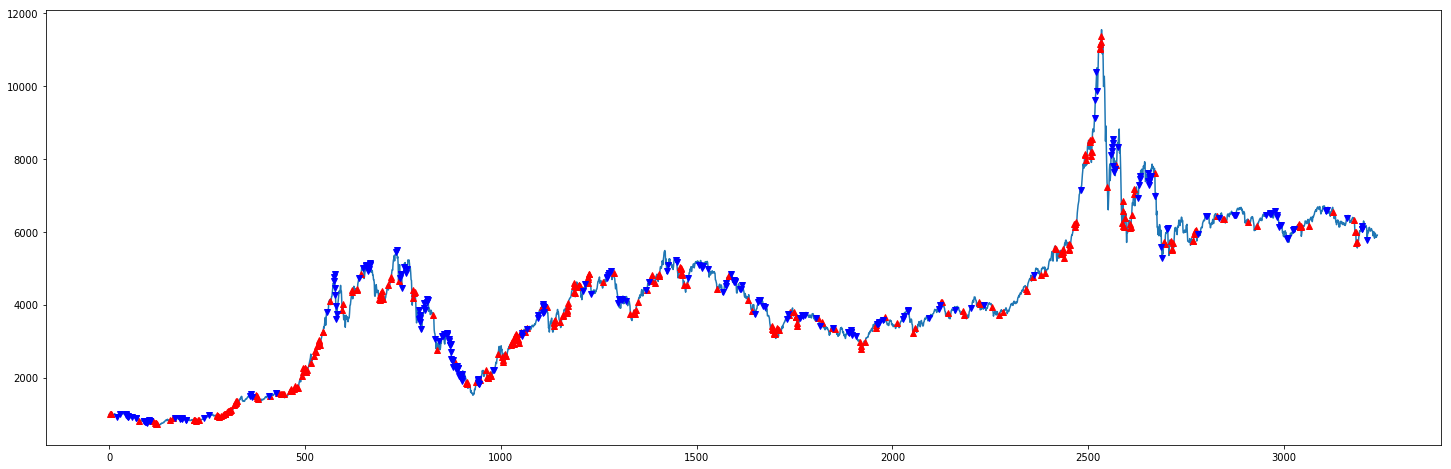

In [126]:
analy_pred(pred, i_quota, upchance = 1.5)

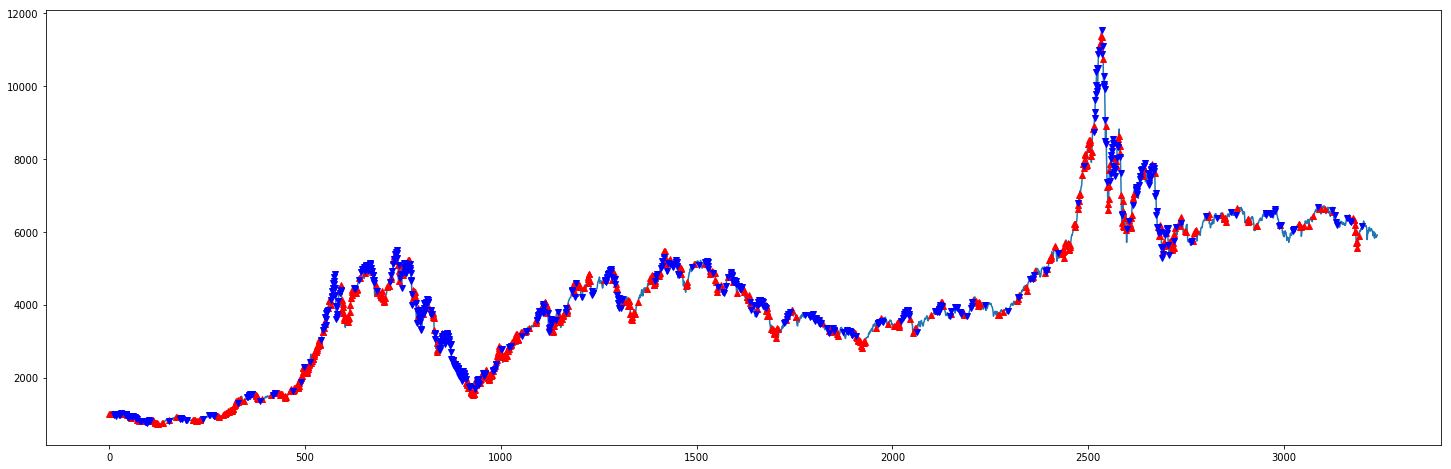

In [125]:
analy_pred_dir(pred, i_quota, upchance = 2.5)

In [ ]:
用之前的模型预测中证500

In [43]:
begdate = 20050101
enddate = 20180505
code = '000300.SH'
predict_period=5
qf2 = QuoteFeed(universe_ticker=code,
                       begin_day = begdate,
                       end_day = enddate,
                      tracking_freq = 86400,
                      is_index=True,
                      adjust_method = 'forward')
qf2.load_feed()
i_quota2 = qf2.get_index_quote()

In [44]:
predict_x2, predict_dump2=get_trainning_data(i_quota2, 100,20)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


feature shape (3233, 201, 2)
predict_x: (3213, 20, 201, 2)


In [46]:
# predict_features2.shape
# predict_x2, predict_dump2=get_data_batch_2d(predict_features2,_ys2,20)
# #predict_y = sess.run([y2], feed_dict={p_x: predict_x})
# pred2=[]
# rest = batch_size - (predict_x2.shape[0] % batch_size)
# print('predict_x:', predict_x2.shape)
# 
# predict_x2=np.concatenate([predict_x2, predict_x2[:rest]])
# predict_dump2=np.concatenate([predict_dump2, predict_dump2[:rest]])
# after_fit2=predict_x2
# print('predict_x:', predict_x2.shape)
# print('predict_y:', predict_dump2.shape)
pred2=[]
total_predict_count2=predict_x2.shape[0]
for X_train_a, y_train_a in tl.iterate.minibatches(predict_x2, predict_dump2, batch_size, shuffle=False):
    pred2.append(sess.run(y2, feed_dict={x: X_train_a}))
    
pred2=np.array(pred2).reshape([-1,2])[:total_predict_count2]

In [ ]:
pred2.shape

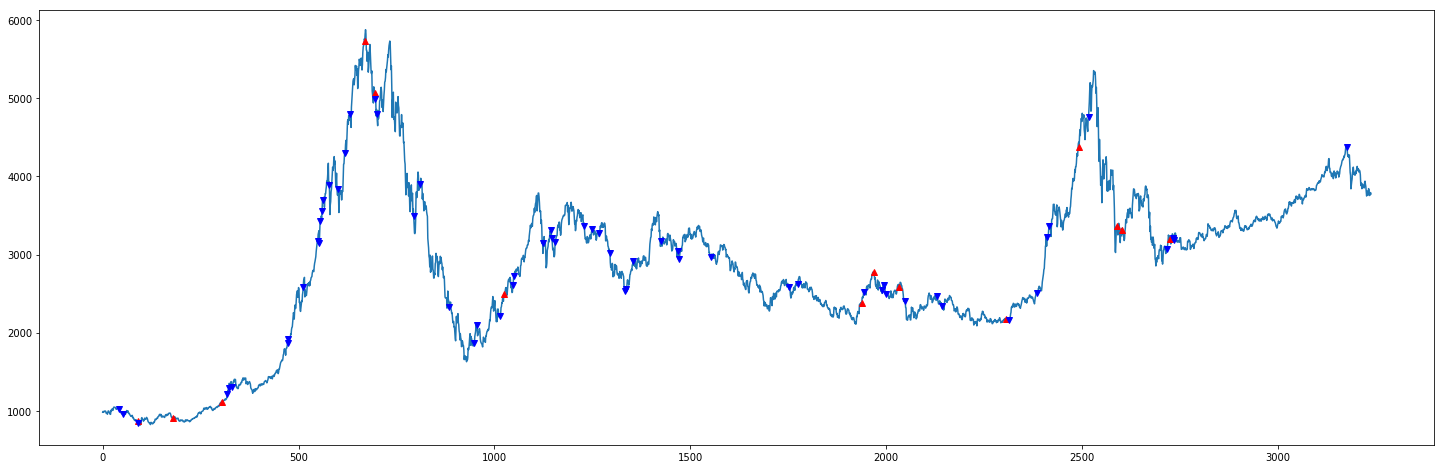

In [47]:
analy_pred(pred2, i_quota2, upchance = 0.4)